# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Vanyariska Indriani
- **Email:** vanyariskaindriani@gmail.com
- **ID Dicoding:** 6RPNY5YVRZ2M

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Apakah cuaca (weather condition) memengaruhi jumlah penyewaan sepeda?
- Bagaimana pola penyewaan sepeda berdasarkan jam (hour) pada workingday dibandingkan holiday?
- Bagaimana pola penambahan pengguna kasual dan terdaftar berdasarkan jam pada hari workingday dibandingkan holiday?

## Import Semua Packages/Library yang Digunakan

In [42]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [43]:
from google.colab import files

# Mengunggah file
uploaded = files.upload()


In [44]:
# Load dataset
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

In [45]:
# Tampilkan 5 baris pertama dataset day_data
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [46]:
# Tampilkan 5 baris pertama dataset hour_data
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- hour.csv: Dataset ini berisi data penyewaan sepeda per jam, lengkap dengan informasi waktu, cuaca, jumlah penyewa, dan data pendukung lainnya.
- day.csv: Dataset ini berisi data penyewaan sepeda per hari. Kolomnya hampir sama dengan yang ada di hour.csv, tapi datanya dirangkum dalam skala harian.
- Kolom yang Mirip: Kedua dataset punya beberapa kolom serupa, seperti temp, hum, cnt, casual, dan registered. Bedanya, di hour.csv datanya per jam, sementara di day.csv sudah dirangkum per hari.
- Kolom Khusus di hour.csv: Kolom hr hanya ada di hour.csv, jadi bisa digunakan untuk melihat pola penggunaan sepeda di jam-jam tertentu.
- Konsistensi Tanggal: Kolom dteday bisa dipakai buat cek apakah data harian di day.csv sesuai sama data yang dijumlahkan dari hour.csv.

### Assessing Data

**ASSESSING DAILY DATA**

In [47]:
# Memeriksa informasi dataset daily
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [48]:
# Memeriksa nilai yang hilang
day_data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [49]:
# Menghitung jumlah nilai unik untuk setiap kolom di day_data
print("Jumlah nilai unik di day_data:")
print(day_data.nunique())

Jumlah nilai unik di day_data:
instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [50]:
# Menghitung jumlah data yang duplikat
print("Jumlah data yang duplikat di day_data: ", day_data.duplicated().sum())

Jumlah data yang duplikat di day_data:  0


**ASSESSING HOURLY DATA**

In [51]:
# Memeriksa informasi dataset daily
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [52]:
# Memeriksa nilai yang hilang
hour_data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [53]:
# Menghitung jumlah nilai unik untuk setiap kolom di hour_data
print("Jumlah nilai unik di hour_data:")
print(hour_data.nunique())

Jumlah nilai unik di hour_data:
instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64


In [54]:
# Menghitung jumlah data yang duplikat
print("Jumlah data yang duplikat di hour_data: ", hour_data.duplicated().sum())

Jumlah data yang duplikat di hour_data:  0


**Insight:**
- Dataset memiliki 17 kolom dengan total 17,379 baris data. Tidak ada data duplikat di dalam dataset ini. Terdapat berbagai tipe data, yaitu int64 (untuk kolom numerik) dan object (untuk tanggal dan beberapa atribut kategori).

- Distribusi Data:
Season dan Year menunjukkan data di dua musim dan dua tahun (2011 dan 2012), dengan musim dan tahun yang cukup seimbang.
Month memiliki distribusi yang merata dengan nilai dari 1 hingga 12.
Hour berkisar dari 0 hingga 23, mencakup seluruh waktu dalam sehari.

- Statistik Deskriptif:
Temperature (temp, atemp, hum, windspeed) menunjukkan nilai minimum, maksimum, dan distribusi yang merata, mencerminkan variasi cuaca dan kondisi lingkungan.
Casual dan Registered menunjukkan jumlah pengguna tidak terdaftar dan terdaftar yang menggunakan sepeda masing-masing, dengan distribusi yang sangat variatif.
Total Count (cnt) memiliki nilai yang sangat bervariasi, dari 1 hingga 977, mencerminkan berbagai permintaan penggunaan sepeda dalam dataset.

- Insight Utama:
Weather (weathersit) mempengaruhi penggunaan sepeda, terlihat dari nilai weathersit yang berkisar dari 1 hingga 4, menunjukkan variasi kondisi cuaca yang berbeda dan efeknya terhadap jumlah penggunaan sepeda.
Faktor-faktor seperti holiday, weekday, dan workingday juga berpengaruh pada penggunaan sepeda, dengan nilai 0 dan 1 menunjukkan apakah hari tersebut adalah hari libur, hari biasa, atau hari kerja.

### Cleaning Data

**CLEANING DAILY DATA**

In [55]:
# Mengubah kolom 'dteday' menjadi tipe datetime
day_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [56]:
day_data.to_csv('day_data_bersih.csv', index=False)

**CLEANING HOURLY DATA**

In [57]:
# Mengubah kolom 'dteday' menjadi tipe datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [58]:
hour_data.to_csv('hour_data_bersih.csv', index=False)

**Insight:**
- Proses ini berhasil mengubah kolom dteday pada dataset hour_data dan day_data dari tipe objek menjadi tipe datetime, memungkinkan analisis lebih lanjut dengan operasi tanggal dan waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

**Eksplorasi Data day_data**

In [59]:
# Tampilkan statistik deskriptif untuk dataset day_data
day_data.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011-01-16 15:02:12.968536320,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-01-08 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2011-01-16 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2011-01-24 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2011-02-02 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [60]:
# Definisikan season_map
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Penyewaan per musim
season_summary = day_data.groupby(['yr', 'season'])['cnt'].mean().reset_index()
season_summary['season_label'] = season_summary['season'].map(season_map)

# Tampilkan hasil
season_summary

,yr,season,cnt,season_label
0,0,1,1666.666667,Spring
1,0,2,3775.173913,Summer
2,0,3,4464.361702,Fall
3,0,4,3664.460674,Winter
4,1,1,3531.296703,Spring
5,1,2,6209.489130,Summer
6,1,3,6824.244681,Fall
7,1,4,5791.865169,Winter


In [61]:
# Penyewaan per kondisi cuaca
weather_summary = day_data.groupby(['weathersit'])['cnt'].mean()
print("Rata-rata penyewaan per kondisi cuaca:\n", weather_summary)

Rata-rata penyewaan per kondisi cuaca:
 weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


In [62]:
# Analisis gabungan cuaca, musim, dan penyewaan
environmental_factors = day_data.groupby(['season', 'weathersit'])[['cnt']].mean().reset_index()

# Tampilkan hasil
environmental_factors

,season,weathersit,cnt
0,1,1,2811.135135
1,1,2,2357.166667
2,1,3,934.750000
3,2,1,5548.548673
4,2,2,4236.705882
5,2,3,1169.000000
6,3,1,5878.257353
7,3,2,5222.479167
8,3,3,2751.750000
9,4,1,5043.563107


**Eksplorasi Data hour_data**

In [63]:
# Tampilkan statistik deskriptif untuk dataset hour_data
hour_data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [64]:
# Rata-rata penyewaan per jam pada hari kerja vs hari libur
hourly_summary = hour_data.groupby(['workingday', 'hr'])['cnt'].mean().reset_index()
print(hourly_summary)

    workingday  hr         cnt
0            0   0   90.800000
1            0   1   69.508696
2            0   2   53.171053
3            0   3   25.775330
4            0   4    8.264317
5            0   5    8.689189
6            0   6   18.742358
7            0   7   43.406926
8            0   8  105.653680
9            0   9  171.623377
10           0  10  255.909091
11           0  11  315.316017
12           0  12  366.259740
13           0  13  372.731602
14           0  14  364.645022
15           0  15  358.813853
16           0  16  352.727273
17           0  17  323.549784
18           0  18  281.056522
19           0  19  231.673913
20           0  20  174.739130
21           0  21  142.060870
22           0  22  116.060870
23           0  23   85.930435
24           1   0   36.786290
25           1   1   16.552632
26           1   2    8.683778
27           1   3    4.942553
28           1   4    5.429787
29           1   5   24.913131
30           1   6  102.500000
31      

In [65]:
# Rata-rata pengguna kasual dan terdaftar per jam
casual_registered_summary = hour_data.groupby(['hr'])[['casual', 'registered']].mean().reset_index()
print(casual_registered_summary)

    hr     casual  registered
0    0  10.158402   43.739669
1    1   6.504144   26.871547
2    2   4.772028   18.097902
3    3   2.715925    9.011478
4    4   1.253945    5.098996
5    5   1.411437   18.478382
6    6   4.161379   71.882759
7    7  11.055021  201.009629
8    8  21.679505  337.331499
9    9  30.891334  188.418157
10  10  46.477304  127.191197
11  11  59.540578  148.602476
12  12  68.293956  185.021978
13  13  72.308642  181.352538
14  14  75.567901  165.381344
15  15  74.905350  176.327846
16  16  73.745205  238.238356
17  17  74.273973  387.178082
18  18  61.120879  364.390110
19  19  48.770604  262.752747
20  20  36.233516  189.796703
21  21  28.255495  144.059066
22  22  22.252747  109.082418
23  23  15.199176   72.631868


**Insight:**
1. **Statistik Deskriptif (Harian):**
   - Rata-rata penyewaan harian total (cnt) adalah **4504 sepeda**, dengan maksimum **8714** dan minimum **22**.
   - Penyewaan oleh pengguna terdaftar (registered) jauh lebih tinggi dibandingkan pengguna kasual, dengan rata-rata masing-masing **3656** dan **848**.
   - **Musim Gugur (Fall)** memiliki penyewaan rata-rata tertinggi (**6824 sepeda**) pada tahun 2012, sementara musim semi (Spring) mencatat rata-rata terendah (**1666 sepeda**) di tahun 2011.

2. **Penyewaan Berdasarkan Kondisi Cuaca:**
   - Cuaca yang cerah atau sebagian berawan (weathersit=1) memiliki rata-rata penyewaan tertinggi (**4876 sepeda**).
   - Cuaca buruk (hujan deras, salju, atau kabut tebal - weathersit=3) menyebabkan penurunan signifikan dalam penyewaan (**1803 sepeda**).

3. **Pola Penyewaan Harian vs Libur:**
   - Pada hari kerja, puncak penyewaan terjadi pada jam **08:00 pagi** (477 sepeda) dan **17:00 sore** (525 sepeda), mencerminkan pola perjalanan kerja.
   - Pada hari libur, penyewaan memuncak antara jam **11:00 siang hingga 16:00 sore**, dengan rata-rata tertinggi **372 sepeda** pada pukul 13:00.

4. **Pengguna Kasual vs Terdaftar:**
   - Pengguna terdaftar mendominasi penyewaan sepanjang hari, terutama pada jam sibuk kerja.
   - Pengguna kasual cenderung lebih aktif di siang hari pada akhir pekan atau libur.

5. **Faktor Musim:**
   - Penyewaan meningkat secara signifikan pada **tahun kedua (2012)** dibandingkan tahun pertama (2011) untuk semua musim, menunjukkan tren pertumbuhan pengguna.

6. **Faktor Cuaca:**
   - Cuaca buruk memiliki dampak signifikan terhadap penurunan jumlah penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

<ipython-input-66-32a6be3e5bf3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_summary, x='season_label', y='cnt', palette='viridis')


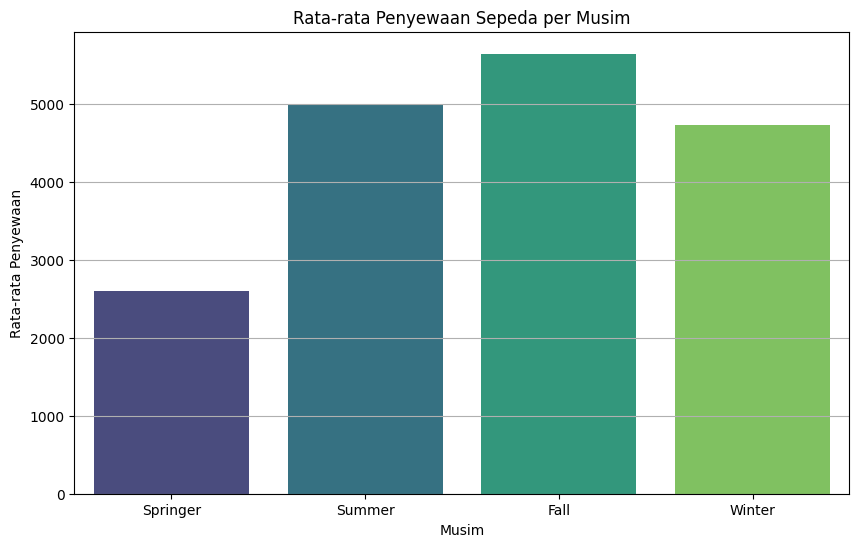

In [66]:
# Membaca dataset
day_data = pd.read_csv('day.csv')

# Menghitung rata-rata penyewaan per musim
season_summary = day_data.groupby('season')['cnt'].mean().reset_index()
season_summary['season_label'] = season_summary['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=season_summary, x='season_label', y='cnt', palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(axis='y')
plt.show()

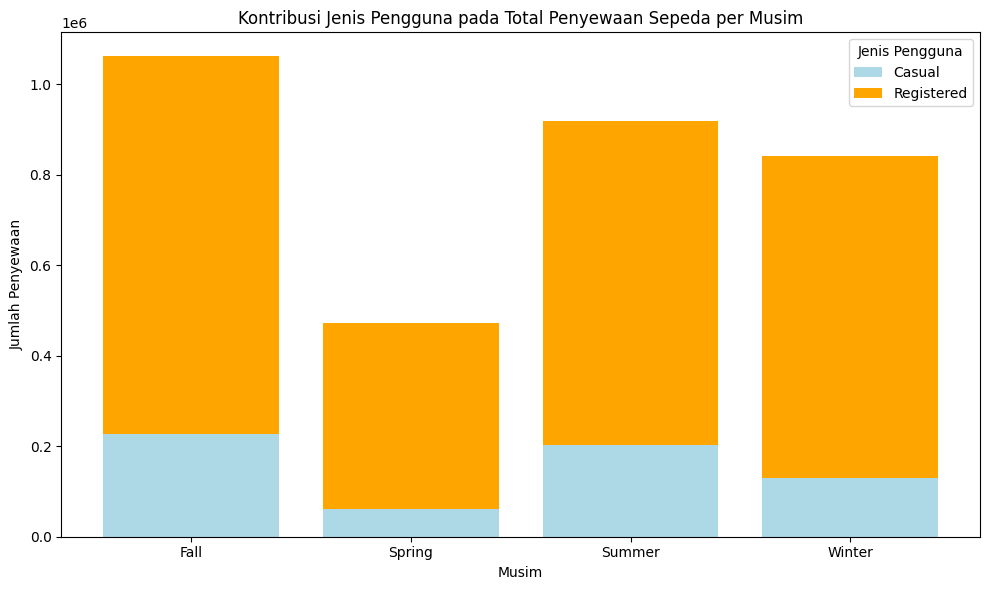

In [67]:
# Menambahkan kolom 'season' dengan nama musim
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_data['season'] = day_data['season'].map(season_mapping)

# Menghitung total penyewaan per musim untuk casual dan registered
seasonal_rentals = day_data.groupby('season')[['casual', 'registered']].sum().reset_index()

# Menambahkan kolom total
seasonal_rentals['total'] = seasonal_rentals['casual'] + seasonal_rentals['registered']

# Membuat stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(seasonal_rentals['season'], seasonal_rentals['casual'], label='Casual', color='lightblue')
plt.bar(seasonal_rentals['season'], seasonal_rentals['registered'], bottom=seasonal_rentals['casual'], label='Registered', color='orange')

# Menambahkan label dan judul
plt.title('Kontribusi Jenis Pengguna pada Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Jenis Pengguna')
plt.tight_layout()
plt.show()

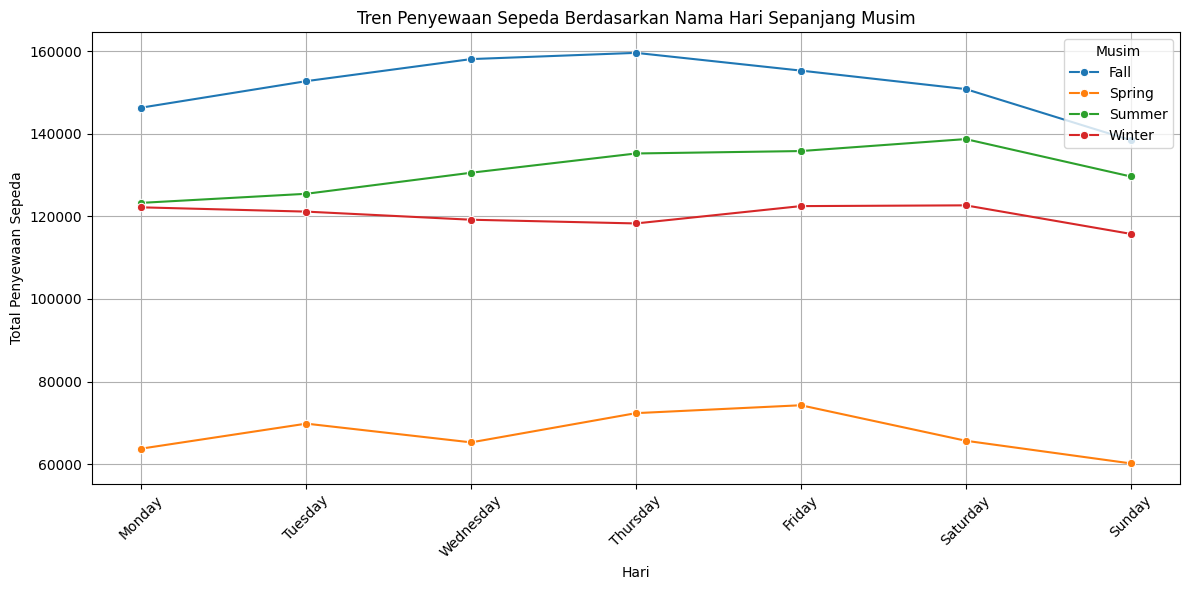

In [68]:
# Memuat data dari file CSV
day_data = pd.read_csv('day.csv')

# Mengganti angka musim dengan nama musim
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_data['season'] = day_data['season'].map(season_mapping)

# Mengganti angka weekday dengan nama hari
day_data['weekday'] = day_data['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# Mengelompokkan data berdasarkan musim dan hari
grouped_data = day_data.groupby(['season', 'weekday'])['cnt'].sum().reset_index()

# Mengatur urutan hari
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data['weekday'] = pd.Categorical(grouped_data['weekday'], categories=days_order, ordered=True)

# Membuat line chart
plt.figure(figsize=(12, 6))

# Loop untuk menggambar garis per musim
for season in grouped_data['season'].unique():
    season_data = grouped_data[grouped_data['season'] == season]
    sns.lineplot(data=season_data, x='weekday', y='cnt', label=season, marker='o')

# Menambahkan judul dan label
plt.title('Tren Penyewaan Sepeda Berdasarkan Nama Hari Sepanjang Musim')
plt.xlabel('Hari')
plt.ylabel('Total Penyewaan Sepeda')

# Menambahkan grid dan rotasi pada label sumbu x
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Menambahkan legenda secara manual
plt.legend(title='Musim')

# Penyesuaian layout untuk tampilan yang lebih baik
plt.tight_layout()

# Menampilkan grafik
plt.show()

### Pertanyaan 2: Apakah cuaca (weather condition) memengaruhi jumlah penyewaan sepeda?

<ipython-input-69-c2ce652d57f5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_summary, x='weathersit_label', y='cnt', palette='viridis')


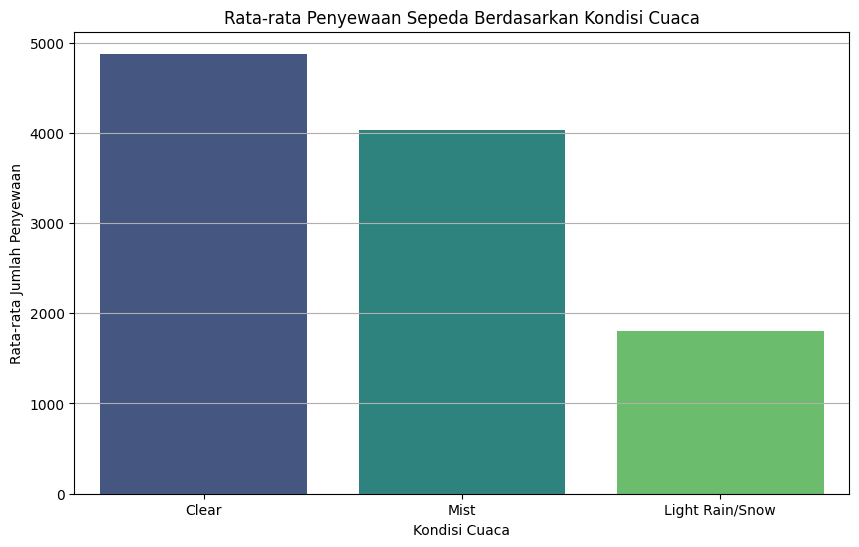

In [69]:
# Menghitung rata-rata penyewaan per kondisi cuaca
weather_summary = day_data.groupby('weathersit')['cnt'].mean().reset_index()
weather_summary['weathersit_label'] = weather_summary['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})

# Visualisasi dengan bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_summary, x='weathersit_label', y='cnt', palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(axis='y')
plt.show()

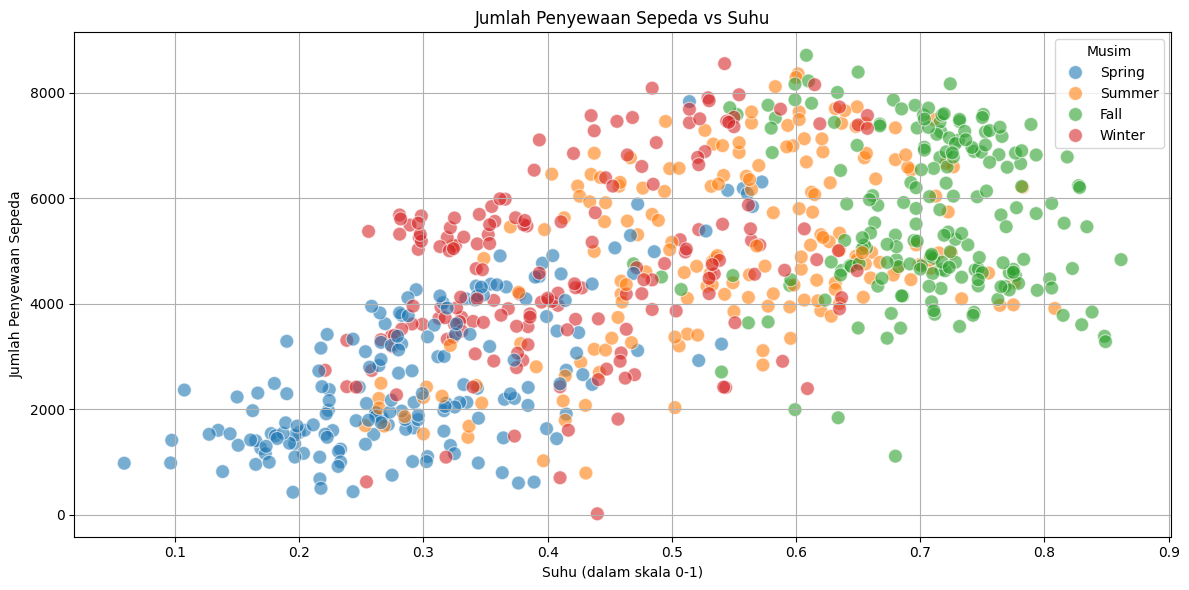

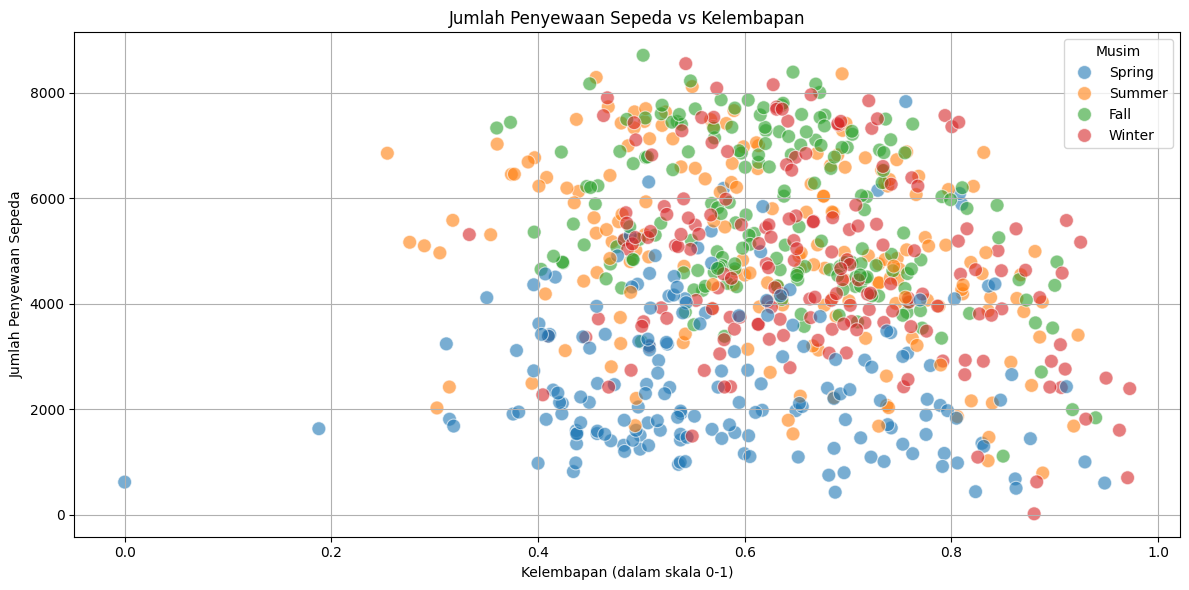

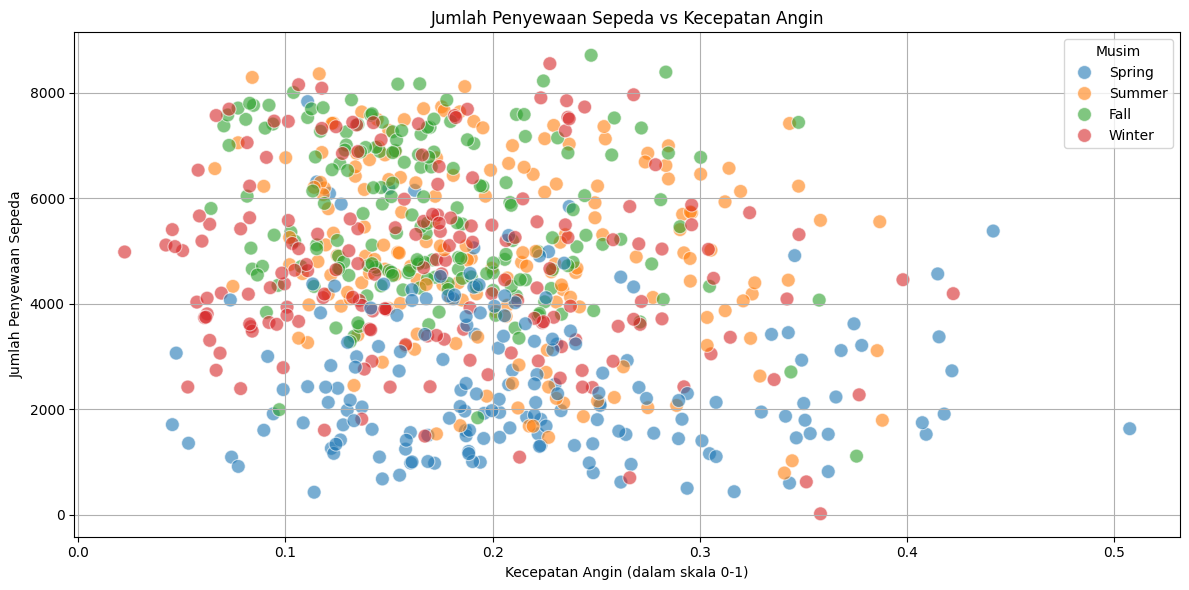

In [70]:
# Memuat data dari file CSV
day_data = pd.read_csv('day.csv')

# Mengganti angka musim dengan nama musim
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_data['season'] = day_data['season'].map(season_mapping)

# Membuat scatter plot untuk membandingkan jumlah penyewaan dengan suhu
plt.figure(figsize=(12, 6))
sns.scatterplot(data=day_data, x='temp', y='cnt', hue='season', alpha=0.6, s=100)
plt.title('Jumlah Penyewaan Sepeda vs Suhu')
plt.xlabel('Suhu (dalam skala 0-1)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True)
plt.legend(title='Musim')
plt.tight_layout()
plt.show()

# Membuat scatter plot untuk membandingkan jumlah penyewaan dengan kelembapan
plt.figure(figsize=(12, 6))
sns.scatterplot(data=day_data, x='hum', y='cnt', hue='season', alpha=0.6, s=100)
plt.title('Jumlah Penyewaan Sepeda vs Kelembapan')
plt.xlabel('Kelembapan (dalam skala 0-1)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True)
plt.legend(title='Musim')
plt.tight_layout()
plt.show()

# Membuat scatter plot untuk membandingkan jumlah penyewaan dengan kecepatan angin
plt.figure(figsize=(12, 6))
sns.scatterplot(data=day_data, x='windspeed', y='cnt', hue='season', alpha=0.6, s=100)
plt.title('Jumlah Penyewaan Sepeda vs Kecepatan Angin')
plt.xlabel('Kecepatan Angin (dalam skala 0-1)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True)
plt.legend(title='Musim')
plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana pola penyewaan sepeda berdasarkan jam (hour) pada workingday dibandingkan holiday?

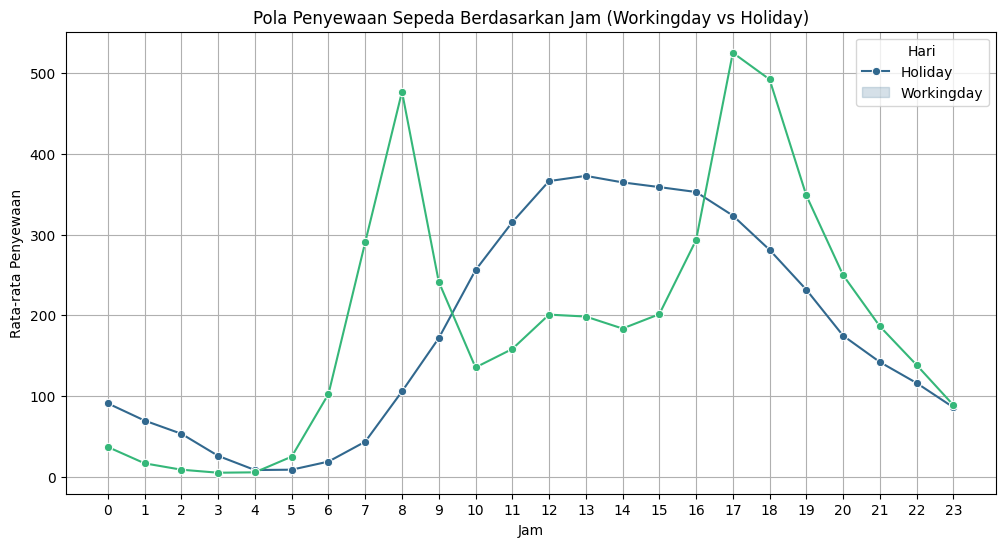

In [71]:
# Menghitung rata-rata penyewaan per jam berdasarkan workingday
hourly_summary = hour_data.groupby(['workingday', 'hr'])['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_summary, x='hr', y='cnt', hue='workingday', marker='o', palette='viridis')
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam (Workingday vs Holiday)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))
plt.legend(title='Hari', labels=['Holiday', 'Workingday'])
plt.grid()
plt.show()

### Pertanyaan 4: Bagaimana pola penambahan pengguna kasual dan terdaftar berdasarkan jam pada hari workingday dibandingkan holiday?

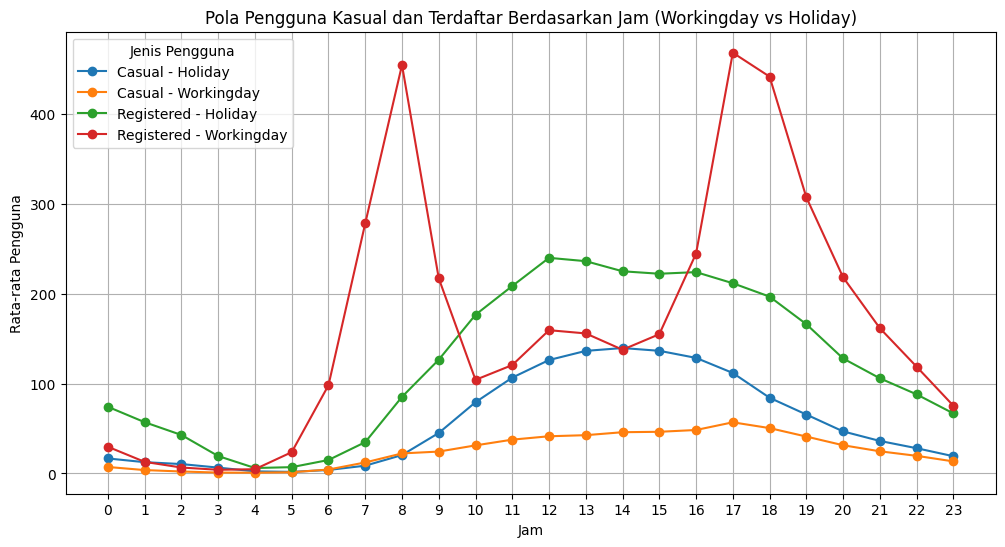

In [72]:
# Menghitung rata-rata pengguna kasual dan terdaftar per jam berdasarkan workingday
casual_registered_summary = hour_data.groupby(['workingday', 'hr'])[['casual', 'registered']].mean().reset_index()

# Visualisasi dengan line chart
plt.figure(figsize=(12, 6))
for user_type in ['casual', 'registered']:
    for working_day in [0, 1]:  # 0 untuk holiday, 1 untuk workingday
        subset = casual_registered_summary[casual_registered_summary['workingday'] == working_day]
        plt.plot(subset['hr'], subset[user_type], marker='o', label=f'{user_type.capitalize()} - {"Holiday" if working_day == 0 else "Workingday"}')

plt.title('Pola Pengguna Kasual dan Terdaftar Berdasarkan Jam (Workingday vs Holiday)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Pengguna')
plt.xticks(range(0, 24))
plt.legend(title='Jenis Pengguna')
plt.grid()
plt.show()

**Insight:**
1. Pertanyaan Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Rata-rata Penyewaan per Musim:
Musim Fall mencatat rata-rata penyewaan sepeda tertinggi, diikuti oleh Summer, Winter,dan Spring.
Faktor cuaca hangat dan stabil selama musim Fall dan Summer berkontribusi pada peningkatan penyewaan sepeda.

- Kontribusi Jenis Pengguna per Musim:
Pengguna terdaftar (registered) secara konsisten menyumbang proporsi penyewaan yang lebih tinggi dibandingkan pengguna kasual.
Musim Fall memiliki peningkatan penyewaan baik dari pengguna kasual maupun terdaftar, menunjukkan minat yang luas selama periode ini.

- Tren Penyewaan Berdasarkan Hari:
Penyewaan tertinggi secara konsisten terjadi pada musim Fall, dan jumlah penyewaannya setiap hari tidak pernah lebih rendah dibandingkan musim lainnya. Hal ini menunjukkan bahwa musim Fall secara keseluruhan adalah musim dengan tingkat penyewaan sepeda yang paling stabil dan tinggi sepanjang minggu.

2. Pertanyaan : Apakah cuaca memengaruhi jumlah penyewaan sepeda?
- Rata-rata Penyewaan Berdasarkan Kondisi Cuaca:
Cuaca cerah (Clear) memiliki rata-rata penyewaan tertinggi, diikuti oleh kabut (Mist), hujan ringan (Light Rain/Snow), dan hujan lebat (Heavy Rain/Snow).
Kondisi cuaca buruk seperti hujan lebat secara signifikan menurunkan jumlah penyewaan sepeda.
- Hubungan dengan Variabel Lingkungan:
  - Suhu: Penyewaan meningkat seiring suhu yang lebih hangat, terutama selama musim panas.
  - Kelembapan: Penyewaan cenderung menurun saat kelembapan tinggi.
  - Kecepatan Angin: Kecepatan angin yang tinggi juga berkorelasi negatif dengan jumlah penyewaan.

3.  Pertanyaan : Bagaimana pola penyewaan sepeda berdasarkan jam pada workingday dibandingkan holiday?
- Workingday:
Puncak penyewaan terjadi pada pagi hari (07:00-09:00) dan sore hari (17:00-19:00), mencerminkan penggunaan sepeda untuk perjalanan kerja.
- Holiday:
Penyewaan lebih tinggi di tengah hari (11:00-16:00), menunjukkan dominasi penggunaan rekreasi selama hari libur.

4. Pertanyaan : Bagaimana pola penambahan pengguna kasual dan terdaftar berdasarkan jam pada hari workingday dibandingkan holiday?
- Pengguna Terdaftar:
Pada hari kerja, puncak penggunaan terjadi pada jam sibuk pagi dan sore, konsisten dengan pola perjalanan harian.
- Pengguna Kasual:
Pada hari libur, pengguna kasual lebih aktif sepanjang siang hingga sore hari, mencerminkan aktivitas rekreasi.
Penyewaan kasual pada hari kerja tetap rendah dibandingkan hari libur.

## Analisis Lanjutan (Opsional)

Untuk analisis lanjutan, kita dapat menggunakan teknik manual clustering untuk mengelompokkan data berdasarkan rentang nilai dari variabel cuaca seperti suhu temp, suhu yang dirasakan atemp, kelembapan hum, dan kecepatan angin windspeed. Teknik ini membantu dalam memahami pola penyewaan sepeda yang dipengaruhi oleh faktor-faktor cuaca tersebut. Langkah pertama adalah membuat fungsi untuk mengelompokkan setiap variabel cuaca (temp, atemp, hum, windspeed) ke dalam kategori berdasarkan rentang nilai yang sesuai. Misalnya, suhu (temp) akan dikelompokkan menjadi tiga kategori: Dingin, Sedang, dan Panas berdasarkan nilai suhu yang dinormalisasi. Begitu juga dengan variabel lainnya, kelembapan (hum) akan dibagi menjadi kategori Rendah, Sedang, dan Tinggi, sedangkan kecepatan angin (windspeed) juga dibagi menjadi kategori serupa. Setelah fungsi clustering disiapkan, langkah berikutnya adalah menerapkannya pada data untuk setiap variabel. Hasil pengelompokan ini kemudian akan divisualisasikan untuk melihat hubungan antara kategori variabel cuaca dengan total penyewaan sepeda cnt, sehingga memungkinkan identifikasi pola yang lebih mendalam.

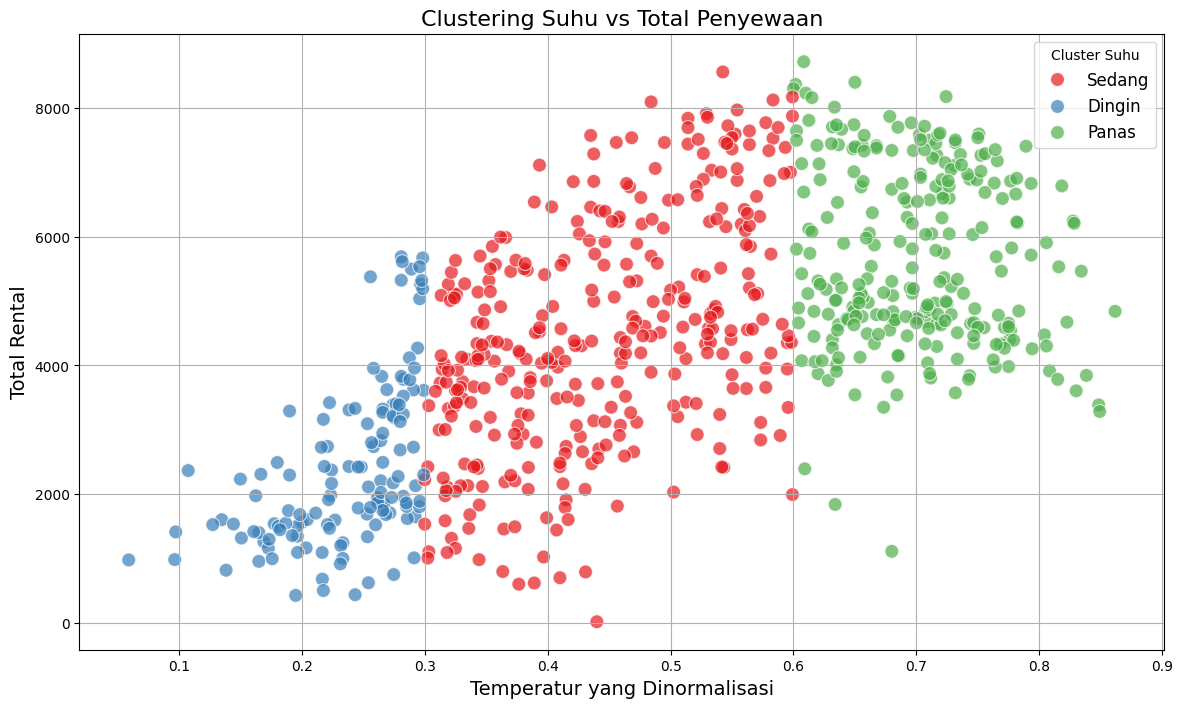

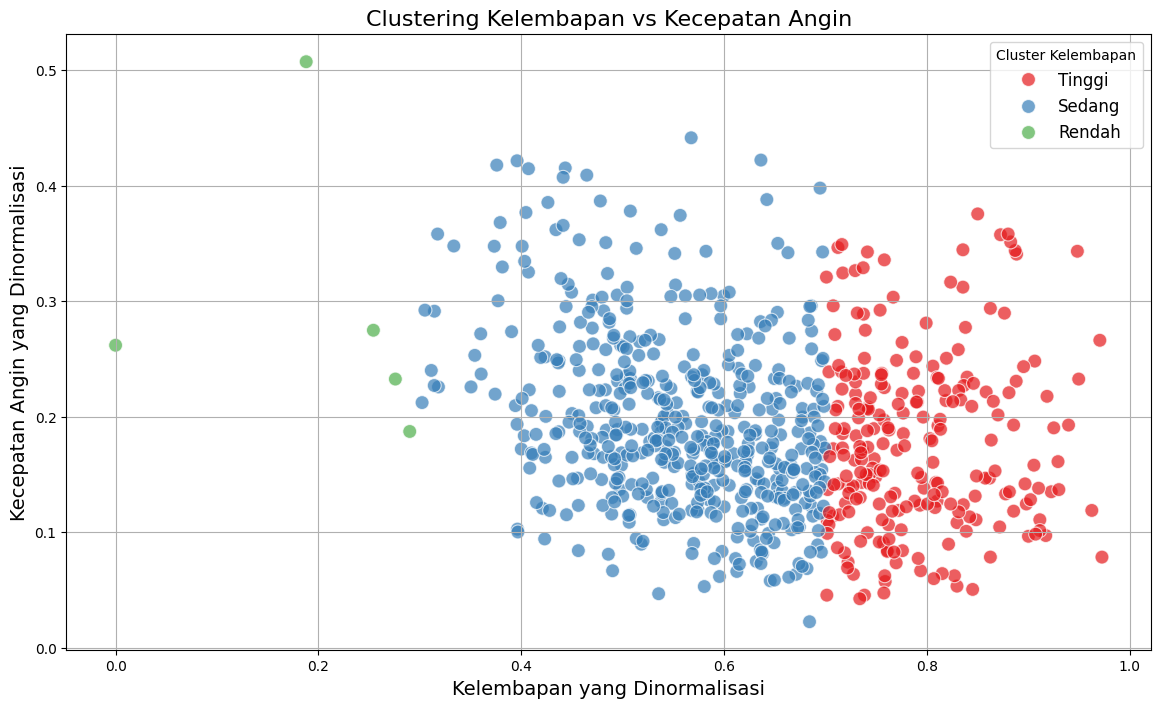

In [73]:
# Fungsi untuk clustering suhu (temp) berdasarkan rentang nilai
def cluster_temperature(temp, thresholds=(0.3, 0.6)):
    if temp < thresholds[0]:
        return 'Dingin'
    elif temp < thresholds[1]:
        return 'Sedang'
    else:
        return 'Panas'

# Fungsi untuk clustering suhu perasaan (atemp)
def cluster_atemp(atemp, thresholds=(0.3, 0.6)):
    if atemp < thresholds[0]:
        return 'Dingin'
    elif atemp < thresholds[1]:
        return 'Sedang'
    else:
        return 'Panas'

# Fungsi untuk clustering kelembapan (hum)
def cluster_humidity(hum, thresholds=(0.3, 0.7)):
    if hum < thresholds[0]:
        return 'Rendah'
    elif hum < thresholds[1]:
        return 'Sedang'
    else:
        return 'Tinggi'

# Fungsi untuk clustering kecepatan angin (windspeed)
def cluster_windspeed(windspeed, thresholds=(0.3, 0.6)):
    if windspeed < thresholds[0]:
        return 'Rendah'
    elif windspeed < thresholds[1]:
        return 'Sedang'
    else:
        return 'Tinggi'

# Terapkan fungsi clustering pada dataset
day_data['temp_cluster'] = day_data['temp'].apply(cluster_temperature)
day_data['atemp_cluster'] = day_data['atemp'].apply(cluster_atemp)
day_data['hum_cluster'] = day_data['hum'].apply(cluster_humidity)
day_data['windspeed_cluster'] = day_data['windspeed'].apply(cluster_windspeed)

# Visualisasikan hasil clustering menggunakan scatter plot
plt.figure(figsize=(14, 8))

# Gabungkan hasil clustering dengan total penyewaan untuk melihat hubungan
sns.scatterplot(x='temp', y='cnt', hue='temp_cluster', data=day_data, palette='Set1', s=100, alpha=0.7)
plt.title('Clustering Suhu vs Total Penyewaan', fontsize=16)
plt.xlabel('Temperatur yang Dinormalisasi', fontsize=14)
plt.ylabel('Total Rental', fontsize=14)
plt.legend(title='Cluster Suhu', fontsize=12)
plt.grid(True)
plt.show()

# Visualisasi hubungan antara kelembapan dan kecepatan angin
plt.figure(figsize=(14, 8))
sns.scatterplot(x='hum', y='windspeed', hue='hum_cluster', data=day_data, palette='Set1', s=100, alpha=0.7)
plt.title('Clustering Kelembapan vs Kecepatan Angin', fontsize=16)
plt.xlabel('Kelembapan yang Dinormalisasi', fontsize=14)
plt.ylabel('Kecepatan Angin yang Dinormalisasi', fontsize=14)
plt.legend(title='Cluster Kelembapan', fontsize=12)
plt.grid(True)
plt.show()

## Conclusion

**Kesimpulan dari Analisis Data**  

1. **Pengaruh Musim terhadap Penyewaan Sepeda**  
   - **Musim Fall (Gugur)** mencatat rata-rata penyewaan tertinggi dibandingkan musim lain, didorong oleh cuaca yang stabil dan nyaman untuk bersepeda.  
   - Penyewaan sepeda meningkat pada semua jenis pengguna (kasual dan terdaftar) selama musim Fall, menunjukkan popularitas musim ini untuk aktivitas bersepeda.  
   - Tren penyewaan harian selama musim Fall konsisten tinggi sepanjang minggu, membuatnya menjadi musim dengan performa terbaik dalam hal stabilitas dan jumlah penyewaan.

2. **Pengaruh Cuaca terhadap Penyewaan Sepeda**  
   - Cuaca cerah atau sebagian berawan (Clear) memiliki rata-rata penyewaan tertinggi, sedangkan cuaca buruk (hujan lebat, salju, atau kabut tebal) menyebabkan penurunan penyewaan yang signifikan.  
   - Penyewaan cenderung lebih tinggi pada suhu hangat, sementara kelembapan tinggi dan angin kencang berkorelasi negatif dengan jumlah penyewaan.

3. **Pola Penyewaan Berdasarkan Jam (Workingday vs Holiday)**  
   - **Hari Kerja (Workingday):** Penyewaan mencapai puncak pada jam sibuk pagi (07:00–09:00) dan sore (17:00–19:00), mencerminkan penggunaan sepeda sebagai alat transportasi kerja.  
   - **Hari Libur (Holiday):** Puncak penyewaan terjadi di siang hingga sore hari (11:00–16:00), menunjukkan penggunaan sepeda untuk aktivitas rekreasi.

4. **Pengguna Kasual vs Terdaftar**  
   - Pengguna terdaftar mendominasi penyewaan selama hari kerja, terutama pada jam sibuk.  
   - Pengguna kasual lebih aktif selama akhir pekan atau hari libur, dengan puncak aktivitas terjadi di tengah hari hingga sore.  
   - Pola ini menunjukkan bahwa pengguna terdaftar cenderung memanfaatkan sepeda untuk kebutuhan transportasi harian, sementara pengguna kasual lebih fokus pada kegiatan rekreasi.

**Kesimpulan Akhir:**  
Musim Fall dan cuaca cerah secara konsisten mendukung peningkatan jumlah penyewaan sepeda. Faktor lingkungan seperti suhu, kelembapan, dan kecepatan angin juga memainkan peran penting dalam memengaruhi penyewaan. Perbedaan pola penggunaan sepeda antara hari kerja dan libur menggarisbawahi kebutuhan untuk merancang strategi yang disesuaikan dengan segmen pengguna tertentu, seperti promosi untuk pengguna kasual selama libur atau peningkatan fasilitas untuk mendukung pengguna terdaftar pada jam sibuk kerja.

**STRATEGI BISNIS YANG DAPAT DILAKUKAN**
**1. Optimalisasi Penyewaan Berdasarkan Musim**
- **Promosi Musiman:**
  - Fokuskan promosi dan diskon selama musim **Spring** karena musim ini memiliki rata-rata penyewaan terendah. Misalnya, tawarkan potongan harga untuk pengguna baru atau promosi "paket langganan" untuk meningkatkan jumlah penyewaan.
  - Maksimalkan keuntungan pada musim **Fall** dengan strategi pemasaran yang menarik, seperti event komunitas sepeda atau program loyalitas.

- **Persiapan Operasional:**
  - Tambahkan lebih banyak sepeda selama musim **Fall** dan **Summer** untuk memenuhi permintaan tinggi.
  - Pastikan perawatan sepeda intensif dilakukan sebelum musim Fall untuk menghindari kendala operasional.

**2. Strategi Berdasarkan Kondisi Cuaca**
- **Integrasi Teknologi Cuaca:**
  - Tambahkan fitur informasi cuaca pada aplikasi penyewaan, sehingga pengguna dapat merencanakan perjalanan mereka dengan lebih baik.
  - Tawarkan diskon atau promosi khusus saat cuaca cerah untuk mendorong lebih banyak penyewaan.

- **Fasilitas Pendukung:**
  - Sediakan perlengkapan seperti jas hujan atau pelindung sepeda untuk pengguna saat cuaca buruk. Ini bisa menjadi tambahan pemasukan jika dijual atau disewakan.

**3. Fokus pada Segmentasi Pengguna**
- **Pengguna Terdaftar:**
  - Tingkatkan penawaran langganan bulanan/tahunan dengan manfaat tambahan, seperti prioritas akses sepeda selama jam sibuk.
  - Bangun program loyalitas, seperti poin yang bisa ditukar dengan diskon atau hadiah.

- **Pengguna Kasual:**
  - Promosikan penyewaan sepeda untuk aktivitas rekreasi, seperti tur kota, terutama pada akhir pekan atau hari libur.
  - Tawarkan paket penyewaan grup dengan harga lebih terjangkau untuk menarik wisatawan atau keluarga.

**4. Pemanfaatan Tren Jam Sibuk**
- **Workingday:**
  - Maksimalkan penggunaan sepeda selama jam sibuk pagi (07:00-09:00) dan sore (17:00-19:00) dengan menyediakan titik penyewaan di dekat kantor, stasiun kereta, atau halte bus.
  - Pertimbangkan untuk menawarkan langganan khusus pekerja dengan paket yang mencakup perjalanan bolak-balik selama hari kerja.

- **Holiday:**
  - Perbanyak promosi penyewaan pada siang hingga sore hari (11:00-16:00) dengan penawaran diskon atau acara khusus seperti "tour bersepeda santai.